Link to code: https://github.com/PeaceDucko/radboud-msc-ds-natcomp/tree/main/assignment_5

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

In [97]:
def prob_correct_majority_vote(c,p):
    res = 0
    for i in range(math.floor(c/2)+1,c+1):
        res += ncr(c,i) * p**i * (1-p)**(c-i)
    return res

In [98]:
# radiologists:
print(f"1 expert radiologist: {prob_correct_majority_vote(1, 0.85)}")
# doctors:
print(f"3 doctors: {prob_correct_majority_vote(3, 0.75)}")
# medical students:
print(f"31 medical students: {prob_correct_majority_vote(31, 0.6)}")

1 expert radiologist: 0.85
3 doctors: 0.84375
31 medical students: 0.8716182723048189


In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'group probability')

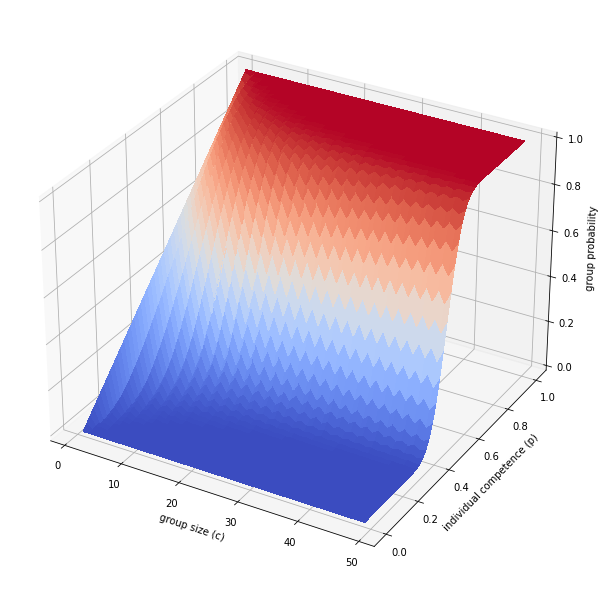

In [99]:
# 3D plot of group probability
group_range = (1, 50)
ps_range = (0,1)
ps_samples = 100

X_SAMPLES = np.arange(group_range[0], group_range[1])
Y_SAMPLES = np.linspace(ps_range[0], ps_range[1], ps_samples)

X_SAMPLES, Y_SAMPLES = np.meshgrid(X_SAMPLES, Y_SAMPLES)

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
# add to Figure
fig.add_axes(ax)

Z_SAMPLES = np.vectorize(prob_correct_majority_vote)(X_SAMPLES, Y_SAMPLES)

surf = ax.plot_surface(X_SAMPLES, Y_SAMPLES, Z_SAMPLES, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('group size (c)')
ax.set_ylabel('individual competence (p)')
ax.set_zlabel('group probability')

Text(0, 0.5, 'group probability')

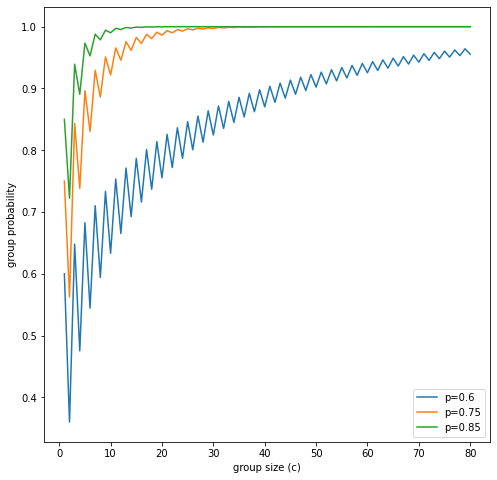

In [100]:
group_range = np.arange(1, 81)
competence_levels = 0.6, 0.75, 0.85

fig = plt.figure(figsize=(8,8))
for comp in competence_levels:
    plt.plot(group_range, list(map(lambda x: prob_correct_majority_vote(x, comp), group_range)), label=f'p={comp}')
plt.legend()
plt.xlabel("group size (c)")
plt.ylabel("group probability")

Text(0, 0.5, 'group probability')

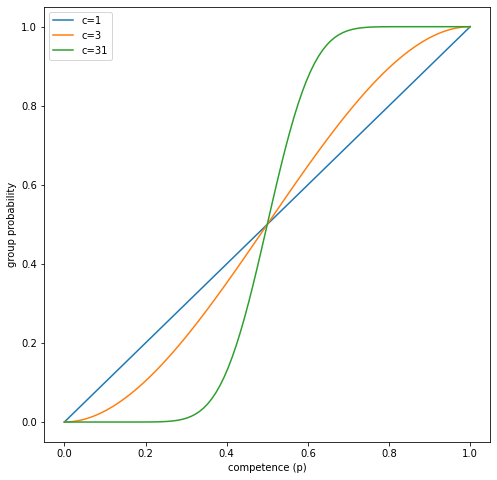

In [101]:
group_sizes = 1,3,31
ps_range = (0,1)
ps_samples = 100

Y_SAMPLES = np.linspace(ps_range[0], ps_range[1], ps_samples)

fig = plt.figure(figsize=(8,8))
for group_size in group_sizes:
    plt.plot(Y_SAMPLES, list(map(lambda x: prob_correct_majority_vote(group_size, x), Y_SAMPLES)), label=f'c={group_size}')
plt.legend()
plt.xlabel("competence (p)")
plt.ylabel("group probability")

In [103]:
print(f"3 doctors: {prob_correct_majority_vote(3, 0.75)}")
print(f"31 medical students: {prob_correct_majority_vote(31, 0.6)}")
doctor_prob = prob_correct_majority_vote(3, 0.75)
last = None
last_i = 0
for i in range(1,31):
    temp = prob_correct_majority_vote(i, 0.6)
    if temp > doctor_prob:
        print(f"At group size {last_i} it would be {last}")
        print(f"At group size {i} it would be {temp}")
        break
    last = temp
    last_i = i

3 doctors: 0.84375
31 medical students: 0.8716182723048189
At group size 24 it would be 0.7869782010394586
At group size 25 it would be 0.846232231024237


### Exercise 3
#### a)

In [11]:
print(f"10 weak classifiers: {prob_correct_majority_vote(10, 0.60)}")

10 weak classifiers: 0.8337613824000001


In [104]:
c = [1,10]
p = [0.75,0.6]
w = [1,10]

# def weighted_prob_correct_majority_vote(c,p,w):
#     res = 0
#     for i in range(math.ceil(c/2),c+1):
#         res += ncr(c,i) * p**i * (1-p)**(c-i)
#     return res

#prob_correct_majority_vote(1,0.75) * prob_correct_majority_vote(10,0.6)

0.6,0.6,0.4

0.6,0.6,0.6

In [105]:
def two_type_majority_vote(c1,p1,c2,p2):
    c = c1+c2
    res = 0
    for majority in range(math.floor(c/2)+1,c+1):
        for c1_correct_size in range(0,c1+1):
            c2_correct_size = majority - c1_correct_size
            if c2_correct_size > c2:
                continue
            
            #print(majority, c1_correct_size , c2_correct_size)
            combinations = ncr(c1,c1_correct_size) * ncr(c2,c2_correct_size)
            #print("Combinations:",combinations)
            c1_prob = p1**c1_correct_size * (1-p1)**(c1-c1_correct_size)
            c2_prob = p2**c2_correct_size * (1-p2)**(c2-c2_correct_size)
            temp = combinations* c1_prob * c2_prob

            #print(majority, c1_correct_size , c2_correct_size, temp)
            res += temp
    return res

#print(two_type_majority_vote(1,0.75,10,0.6))

In [115]:
print(two_type_majority_vote(1,0.75,11,0.6))
print(prob_correct_majority_vote(1, 0.75))
print(prob_correct_majority_vote(10, 0.6))

0.69831714816
0.75
0.6331032576


#### b)

In [118]:
def weighted_two_type_majority_vote(w1,c1,p1, w2,c2,p2):
    c = c1+c2
    res = 0
    for c1_amount in range(0,c1+1):
        for c2_amount in range(0,c2+1):
            if (w1*c1_amount+w2*c2_amount)/(w1*c1+w2*c2) > 0.5:
                #print(c1_amount, c2_amount, "total:", c1_amount + c2_amount)
                combinations = ncr(c1,c1_amount) * ncr(c2,c2_amount)
                #print("Combinations:",combinations)
                c1_prob = p1**c1_amount * (1-p1)**(c1-c1_amount)
                c2_prob = p2**c2_amount * (1-p2)**(c2-c2_amount)
                temp = combinations* c1_prob * c2_prob

                #print(majority, c1_correct_size , c2_correct_size, temp)
                res += temp
    return res

print(two_type_majority_vote(1,0.75,10,0.6))
print(weighted_two_type_majority_vote(2,1,0.75, 2,10,0.6))

0.7835968511999999
0.7835968511999999


Text(0.5, 0, 'majority correct decision probability')

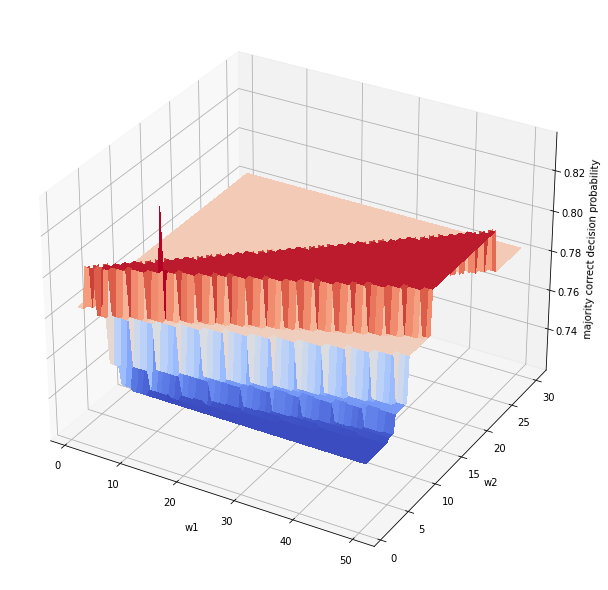

In [119]:
w1_range = (1, 50)
w2_range = (1, 30)
dim_samples = 100

X_SAMPLES = np.linspace(w1_range[0], w1_range[1], dim_samples)
Y_SAMPLES = np.linspace(w2_range[0], w2_range[1], dim_samples)

X_SAMPLES, Y_SAMPLES = np.meshgrid(X_SAMPLES, Y_SAMPLES)

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
# add to Figure
fig.add_axes(ax)

def h(x,y):
    return weighted_two_type_majority_vote(x,1,0.75, y,10,0.6)

Z_SAMPLES = np.vectorize(h)(X_SAMPLES, Y_SAMPLES)

surf = ax.plot_surface(X_SAMPLES, Y_SAMPLES, Z_SAMPLES, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('majority correct decision probability')

Text(0, 0.5, 'majority correct decision probability')

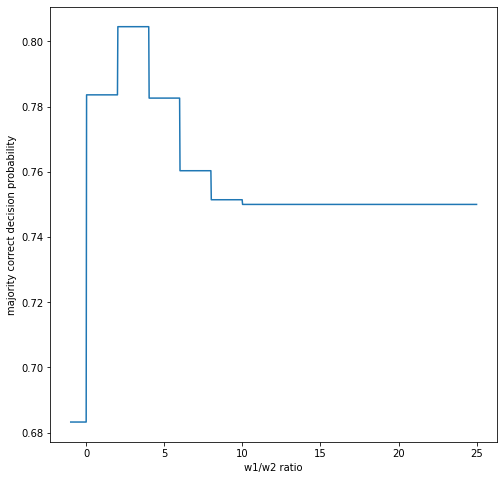

In [123]:
ratio_range = (-1,25)
dim_samples = 1000

X_SAMPLES = np.linspace(ratio_range[0], ratio_range[1], dim_samples)

def h(x):
    return weighted_two_type_majority_vote(x,1,0.75, 1,10,0.6)

fig = plt.figure(figsize=(8,8))
plt.plot(X_SAMPLES, list(map(lambda x: h(x), X_SAMPLES)))
plt.xlabel("w1/w2 ratio")
plt.ylabel("majority correct decision probability")

#### c)

In [28]:
print(w1_range)
print(w2_range)

strong_clf_prob = 0.75
weak_clf_prob = 0.6

def compute_alpha(acc):
    error = 1-acc
    alpha = np.log((1-error)/error)

    return alpha

def compute_weights(alpha, w):
    w = w * np.exp(alpha*1) # We set 1 to assume that y_i != G_m(x_i), simulating a weight update

    return w

w1_min, w1_max = w1_range
w2_min, w2_max = w2_range

print("Strong clf weights -- Weak clf weights")

w1_list = []
w2_list = []

for w1,w2 in zip(range(w1_min, w1_max+1),range(w2_min, w2_max+1)):
    alpha_m1 = compute_alpha(strong_clf_prob)
    alpha_m2 = compute_alpha(weak_clf_prob)

    w1 = compute_weights(alpha_m1,w1)
    w2 = compute_weights(alpha_m2,w2)

    w1_list.append(w1)
    w2_list.append(w2)

for w1,w2 in zip(w1_list,w2_list):
    print("{} - {}".format(w1,w2))

(1, 50)
(1, 30)
Strong clf weights -- Weak clf weights
3.0000000000000004 - 1.4999999999999998
6.000000000000001 - 2.9999999999999996
9.000000000000002 - 4.499999999999999
12.000000000000002 - 5.999999999999999
15.000000000000002 - 7.499999999999999
18.000000000000004 - 8.999999999999998
21.000000000000004 - 10.499999999999998
24.000000000000004 - 11.999999999999998
27.000000000000004 - 13.499999999999998
30.000000000000004 - 14.999999999999998
33.00000000000001 - 16.499999999999996
36.00000000000001 - 17.999999999999996
39.00000000000001 - 19.499999999999996
42.00000000000001 - 20.999999999999996
45.00000000000001 - 22.499999999999996
48.00000000000001 - 23.999999999999996
51.00000000000001 - 25.499999999999996
54.00000000000001 - 26.999999999999996
57.00000000000001 - 28.499999999999996
60.00000000000001 - 29.999999999999996
63.00000000000001 - 31.499999999999996
66.00000000000001 - 32.99999999999999
69.00000000000001 - 34.49999999999999
72.00000000000001 - 35.99999999999999
75.00000

Text(0, 0.5, 'w2 weight')

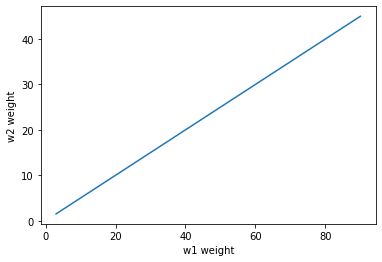

In [30]:
plt.plot(w1_list,w2_list)

plt.xlabel("w1 weight")
plt.ylabel("w2 weight")

#### d)

In [68]:
w=1

w_list = []
error_list = []

for acc in np.linspace(1,99,99)/100:
    alpha = compute_alpha(acc)
    error_list.append(1-acc)

    w = compute_weights(alpha,1)
    w_list.append(w)

In [88]:
alpha = compute_alpha(0.50)
print(compute_weights(alpha,1))

1.0


Text(0, 0.5, 'weight')

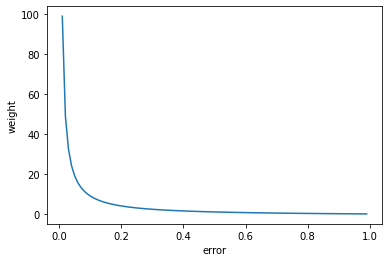

In [84]:
plt.plot(error_list,w_list)

plt.xlabel("error")
plt.ylabel("weight")

### Exercise 5


In [ ]:
class Pruning:
    def __init__(self, scoring, X, y):
        self.scoring = scoring
        self.X = X
        self.y = y

    def random_forest_hyper_parameters(self):
        param_grid = {'max_depth': np.arange(3, 10), 'min_samples_split': [10, 15, 25, 35, 50, 75],
                      'min_samples_leaf': [5, 10, 15, 20, 25]}

        random_forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring=self.scoring).fit(self.X,
                                                                                                          self.y)

        print('Best params for random forest are: ' + str(random_forest_grid.best_params_))

        return random_forest_grid.best_params_

class DataPreparation:

    def __init__(self, dataSet):
        self.dataSet = dataSet

    def set_feature_values(self, basic_G3=True, test=False):
        """
        Always add the full parameters like basic_G3=False.
        This will prevent you from changing self.
        parameters
        ----------
        basic_G3 : Boolean
            If True G3 feature is a Boolean, otherwise it's numerical.
        test: Boolean
            If true give the first 10 rows of the data set.
            This will decrease the time for testing new methods elsewhere.
        :rtype: object
        """
        self.dataSet['school'].replace({'GP': 0, 'MS': 1}, inplace=True)
        self.dataSet['sex'].replace({'F': 0, 'M': 1}, inplace=True)
        self.dataSet['address'].replace({'U': 0, 'R': 1}, inplace=True)
        self.dataSet['famsize'].replace({'LE3': 0, 'GT3': 1}, inplace=True)
        self.dataSet['Pstatus'].replace({'T': 0, 'A': 1}, inplace=True)
        self.dataSet['Mjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4},
                                     inplace=True)
        self.dataSet['Fjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4},
                                     inplace=True)
        self.dataSet['reason'].replace({'home': 0, 'reputation': 1, 'course': 2, 'other': 3}, inplace=True)
        self.dataSet['guardian'].replace({'mother': 0, 'father': 1, 'other': 2}, inplace=True)
        self.dataSet['schoolsup'].replace({'no': 0, 'yes': 1}, inplace=True)
        self.dataSet['famsup'].replace({'no': 0, 'yes': 1}, inplace=True)
        self.dataSet['paid'].replace({'no': 0, 'yes': 1}, inplace=True)
        self.dataSet['activities'].replace({'no': 0, 'yes': 1}, inplace=True)
        self.dataSet['nursery'].replace({'no': 0, 'yes': 1}, inplace=True)
        self.dataSet['higher'].replace({'no': 0, 'yes': 1}, inplace=True)
        self.dataSet['internet'].replace({'no': 0, 'yes': 1}, inplace=True)
        self.dataSet['romantic'].replace({'no': 0, 'yes': 1}, inplace=True)

        if basic_G3:
            self.dataSet['G3'].replace({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0,
                                        10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1},
                                       inplace=True)
        else:
            self.dataSet['G3'].replace({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1,
                                        10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3, 20: 3},
                                       inplace=True)
        if test:
            return self.dataSet.head(10)
        else:
            return self.dataSet

Best params for random forest are: {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 15}
Random Forest with G1 and G2 trained set(por): 0.9384615384615385
Random Forest with G1 and G2 math set: 0.7569620253164557
Best params for random forest are: {'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 10}
Random Forest with G1 and no G2 trained set(por): 0.8461538461538461
Random Forest with G1 and no G2 math set: 0.7164556962025317


KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=89440646-9834-412c-9b8b-9adf276da239' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>